In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing data set
df = pd.read_csv('data_s.csv')

In [3]:
def data_information(data):
    print("Data shape  number_rows/number_columns{}".format(data.shape))
    print()
    print()
    print("Featurs in data sets are:\n{}".format(data.columns))
    print()
    print()
    print("Statistic view on data \n{}".format(data.describe()))
    print()
    print("Head of data set\n{}".format(data.head(5)))
    print()
    print("Tail of data set\n{}".format(data.tail(5)))
    print()
    print()
    print("Nan values in data set\n{}".format(data.isnull().sum()))

In [4]:
data_information(df)

Data shape  number_rows/number_columns(1000, 8)


Featurs in data sets are:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


Statistic view on data 
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Head of data set
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degre

In [5]:
#df_num is sub set of dataframe that consists only numeric values
def numeric_data(data):
    df_num =data.select_dtypes(include=["int64","float64"])
    return df_num

In [6]:
# First we will use LaberEncoder for nominal features with only to possible values
def label_Encoder(data,feature):
    from sklearn.preprocessing import LabelEncoder
    lab_enc = LabelEncoder()
    data['gen_lab'] = lab_enc.fit_transform(data[feature].values)
    return data
 



In [7]:
label_Encoder(df,"gender")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gen_lab
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0
996,male,group C,high school,free/reduced,none,62,55,55,1
997,female,group C,high school,free/reduced,completed,59,71,65,0
998,female,group D,some college,standard,completed,68,78,77,0


In [8]:
def one_hot_encoder(feature_name):
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder()
    ohe.fit(df.loc[:,[feature_name]])
    df_enc = pd.DataFrame(ohe.transform(df.loc[:, [feature_name]]).toarray(), columns=ohe.get_feature_names())
    return df_enc

In [9]:
df1_enc=one_hot_encoder('race/ethnicity')
df2_enc=one_hot_encoder('parental level of education')

In [10]:
# Concatenation of data_set with new df_frames after one_hote_encoder
# if we have more feature to encode in list functon put all new datasets devided by coma
df_transform = pd.concat([df,df1_enc,df2_enc], axis=1)
df_transform.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gen_lab,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,female,group B,bachelor's degree,standard,none,72,72,74,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,female,group C,some college,standard,completed,69,90,88,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
def drop_categorical_feature(data,features_list):
    df_modeling=data.drop(features_list, axis=1)
    return df_modeling

In [12]:
df_modeling=drop_categorical_feature(df_transform,["gender","race/ethnicity","parental level of education","lunch","test preparation course"])

In [13]:
df_modeling

,math score,reading score,writing score,gen_lab,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,72,72,74,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,69,90,88,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,90,95,93,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,57,44,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,76,78,75,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
996,62,55,55,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997,59,71,65,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
998,68,78,77,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split dataset X,y

In [15]:
def split_data_set(data,dependant_feature):
    y=data[dependant_feature]
    X=data.drop(dependant_feature,axis=1)
    return X,y

In [16]:
X,y=split_data_set(df_modeling,'math score')

In [17]:
recnik_featura={}
for i,v in enumerate(X.columns):
    recnik_featura[i]=v
for x in recnik_featura:
    print(x,recnik_featura[x])

0 reading score
1 writing score
2 gen_lab
3 x0_group A
4 x0_group B
5 x0_group C
6 x0_group D
7 x0_group E
8 x0_associate's degree
9 x0_bachelor's degree
10 x0_high school
11 x0_master's degree
12 x0_some college
13 x0_some high school


In [18]:
print("X:{}\n y:{}".format(X.shape,y.shape))


X:(1000, 14)
 y:(1000,)


In [19]:
feature_importanc_Regression={}
feature_importanc_Classification={}
#df_importance=pd.DataFrame(["Model"],["Feature"],["Importanc"])

In [20]:
feature_importance_model=[]
feature_importanc_feature=[]
feature_importanc_value=[]
def feature_importance(mod,importance):
    maximum=max(importance)
    for i,v in enumerate(importance):
        if v==maximum:
            feature_importance_model.append(mod)
            feature_importanc_feature.append(i)
            feature_importanc_value.append(v)
    return(feature_importance_model,feature_importanc_feature,feature_importanc_value)

Feature: 0, Score: 0.34061
Feature: 1, Score: 0.61829
Feature: 2, Score: 13.06691
Feature: 3, Score: -1.38274
Feature: 4, Score: -0.46410
Feature: 5, Score: -1.09465
Feature: 6, Score: -0.85680
Feature: 7, Score: 3.79828
Feature: 8, Score: 0.25183
Feature: 9, Score: -0.82203
Feature: 10, Score: 0.95117
Feature: 11, Score: -1.62293
Feature: 12, Score: 0.74758
Feature: 13, Score: 0.49438


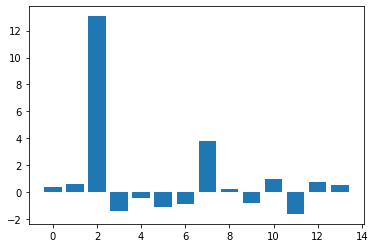

([LinearRegression()], [2], [13.066910474370525])

In [21]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = split_data_set(df_modeling,'math score')
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
   
#plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


feature_importance(mod=model,importance=importance) 


Feature: 0, Score: 0.61255
Feature: 1, Score: 0.19921
Feature: 2, Score: 0.11816
Feature: 3, Score: 0.00238
Feature: 4, Score: 0.00700
Feature: 5, Score: 0.00773
Feature: 6, Score: 0.00834
Feature: 7, Score: 0.01037
Feature: 8, Score: 0.00784
Feature: 9, Score: 0.00483
Feature: 10, Score: 0.00641
Feature: 11, Score: 0.00449
Feature: 12, Score: 0.00668
Feature: 13, Score: 0.00401


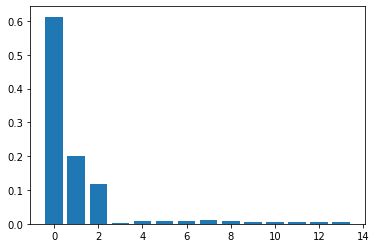

([LinearRegression(), 'DecisionTreeRegressor'],
 [2, 0],
 [13.066910474370525, 0.6125543919726226])

In [22]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X, y = split_data_set(df_modeling,'math score')
# define the model
model1 = DecisionTreeRegressor()
# fit the model
model1.fit(X, y)
# get importance
importance = model1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
model="DecisionTreeRegressor"
feature_importance(mod=model,importance=importance) 

Feature: 0, Score: 0.60382
Feature: 1, Score: 0.21270
Feature: 2, Score: 0.11722
Feature: 3, Score: 0.00365
Feature: 4, Score: 0.00646
Feature: 5, Score: 0.00684
Feature: 6, Score: 0.00602
Feature: 7, Score: 0.01036
Feature: 8, Score: 0.00686
Feature: 9, Score: 0.00557
Feature: 10, Score: 0.00610
Feature: 11, Score: 0.00314
Feature: 12, Score: 0.00688
Feature: 13, Score: 0.00438


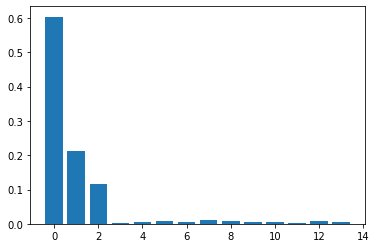

([LinearRegression(), 'DecisionTreeRegressor', 'RandomForest'],
 [2, 0, 0],
 [13.066910474370525, 0.6125543919726226, 0.6038227508863456])

In [23]:
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = split_data_set(df_modeling,'math score')
# define the model
model1= RandomForestRegressor()
# fit the model
model1.fit(X, y)
# get importance
importance = model1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
modl="RandomForest"
feature_importance(mod=modl,importance=importance)

Feature: 0, Score: 0.24802
Feature: 1, Score: 0.13872
Feature: 2, Score: 0.27008
Feature: 3, Score: 0.02270
Feature: 4, Score: 0.02395
Feature: 5, Score: 0.02181
Feature: 6, Score: 0.02475
Feature: 7, Score: 0.10628
Feature: 8, Score: 0.02405
Feature: 9, Score: 0.02162
Feature: 10, Score: 0.02126
Feature: 11, Score: 0.02875
Feature: 12, Score: 0.02730
Feature: 13, Score: 0.02069


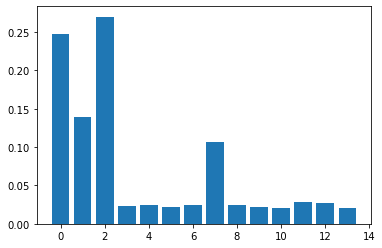

([LinearRegression(), 'DecisionTreeRegressor', 'RandomForest', 'XGBReeg'],
 [2, 0, 0, 2],
 [13.066910474370525, 0.6125543919726226, 0.6038227508863456, 0.2700766])

In [24]:
# xgboost for feature importance on a regression problem

from xgboost import XGBRegressor
from matplotlib import pyplot
# define dataset
X, y = split_data_set(df_modeling,'math score')
# define the model
model="XGBReeg"
modell= XGBRegressor()
# fit the model
modell.fit(X, y)
# get importance
importance = modell.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

feature_importance(mod=model,importance=importance)



In [25]:
#Results of models 
df_import = pd.DataFrame({"Model_name":feature_importance_model,"Feature":feature_importanc_feature,"Importanc":feature_importanc_value})
df_import


,Model_name,Feature,Importanc
0,LinearRegression(),2,13.066910
1,DecisionTreeRegressor,0,0.612554
2,RandomForest,0,0.603823
3,XGBReeg,2,0.270077


In [26]:
df_import['Feature']=df_import['Feature'].map({0:"reading score",2: "gen_lab"})



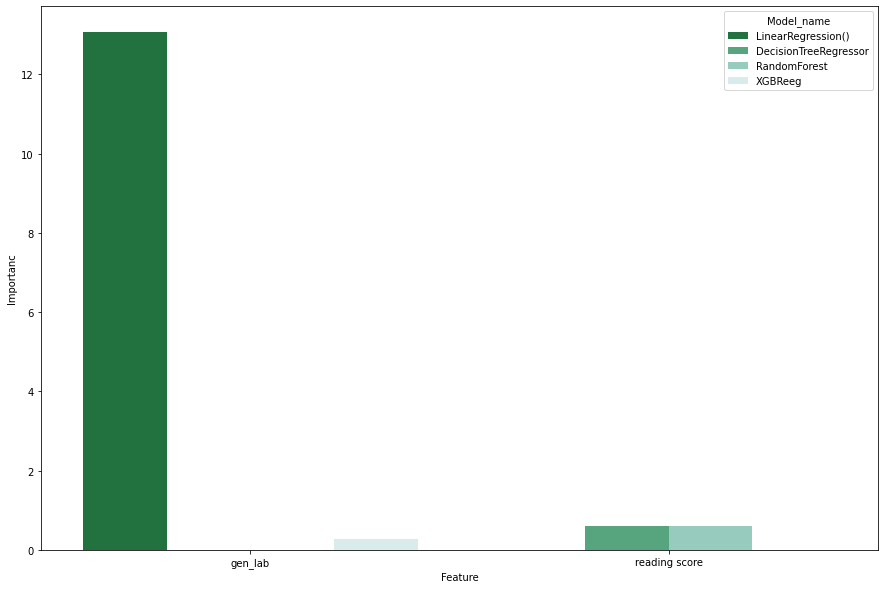

In [27]:

fig = plt.gcf()
fig.set_size_inches(15,10)
ax = sns.barplot(x="Feature", y="Importanc", data=df_import, ci=False, hue = 'Model_name',palette="BuGn_r")

In [28]:
# Importing data set
df1 = pd.read_csv('Iris.csv')

In [29]:
def data_information(data):
    print("Data shape  number_rows/number_columns{}".format(data.shape))
    print()
    print()
    print("Featurs in data sets are:\n{}".format(data.columns))
    print()
    print()
    print("Statistic view on data \n{}".format(data.describe()))
    print()
    print("Head of data set\n{}".format(data.head(5)))
    print()
    print("Tail of data set\n{}".format(data.tail(5)))
    print()
    print()
    print("Nan values in data set\n{}".format(data.isnull().sum()))

In [30]:
data_information(df1)

Data shape  number_rows/number_columns(150, 6)


Featurs in data sets are:
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


Statistic view on data 
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Head of data set
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species


In [31]:
df1.pop('Id' )
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
df1['Species']=df1['Species'].map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2 })

In [33]:
X,y=split_data_set(df1,"Species")

In [34]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
recnik_featura={}
for i,v in enumerate(X.columns):
    recnik_featura[i]=v
for x in recnik_featura:
    print(x,recnik_featura[x])

0 SepalLengthCm
1 SepalWidthCm
2 PetalLengthCm
3 PetalWidthCm


In [36]:
feature_importance_mod=[]
feature_importanc_feat=[]
feature_importanc_val=[]
def feature_importance(mod,importance):
    maximum=max(importance)
    for i,v in enumerate(importance):
        if v==maximum:
            feature_importance_mod.append(mod)
            feature_importanc_feat.append(i)
            feature_importanc_val.append(v)
    return(feature_importance_mod,feature_importanc_feat,feature_importanc_val)

Feature: 0, Score: -0.42340
Feature: 1, Score: 0.96169
Feature: 2, Score: -2.51942
Feature: 3, Score: -1.08608


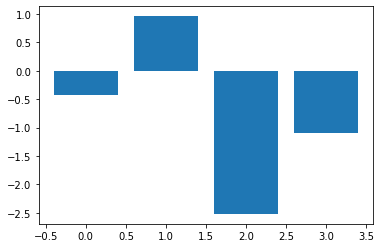

(['LogisticRegression'], [1], [0.9616891781782764])

In [37]:
# logistic regression for feature importance

from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = split_data_set(df1,'Species')
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
model_n="LogisticRegression"
feature_importance(mod=model_n,importance=importance)

In [38]:
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Feature: 0, Score: 0.08737
Feature: 1, Score: 0.01883
Feature: 2, Score: 0.48524
Feature: 3, Score: 0.40855


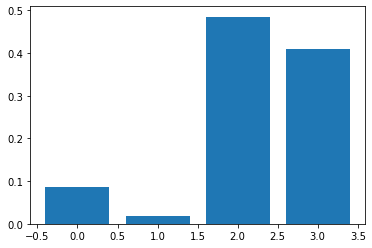

(['LogisticRegression', 'RandomForestClassifier'],
 [1, 2],
 [0.9616891781782764, 0.4852412231987025])

In [39]:

from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = split_data_set(df1,'Species')
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
model_n="RandomForestClassifier"
feature_importance(mod=model_n,importance=importance)

Feature: 0, Score: 0.00924
Feature: 1, Score: 0.01657
Feature: 2, Score: 0.67966
Feature: 3, Score: 0.29453


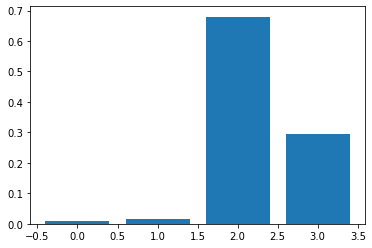

(['LogisticRegression', 'RandomForestClassifier', 'XGBClassifier'],
 [1, 2, 2],
 [0.9616891781782764, 0.4852412231987025, 0.6796648])

In [40]:
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = split_data_set(df1,'Species')
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
model_n="XGBClassifier"
feature_importance(mod=model_n,importance=importance)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.01333
Feature: 2, Score: 0.06406
Feature: 3, Score: 0.92261


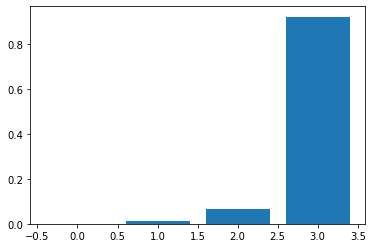

(['LogisticRegression',
  'RandomForestClassifier',
  'XGBClassifier',
  'DecisionTreeClassifier'],
 [1, 2, 2, 3],
 [0.9616891781782764, 0.4852412231987025, 0.6796648, 0.9226107085346216])

In [41]:
# decision tree for feature importance on a classification problem

from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = split_data_set(df1,'Species')
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
model_n="DecisionTreeClassifier"
feature_importance(mod=model_n,importance=importance)


In [42]:
df_importt = pd.DataFrame({"Model_name":feature_importance_mod,"Feature":feature_importanc_feat,"Importanc":feature_importanc_val})
df_importt

,Model_name,Feature,Importanc
0,LogisticRegression,1,0.961689
1,RandomForestClassifier,2,0.485241
2,XGBClassifier,2,0.679665
3,DecisionTreeClassifier,3,0.922611


In [43]:
df_importt['Feature']=df_importt['Feature'].map({1:"SepalWidthCm",2:"PetalLengthCm",3:'PetalWidthCm'})




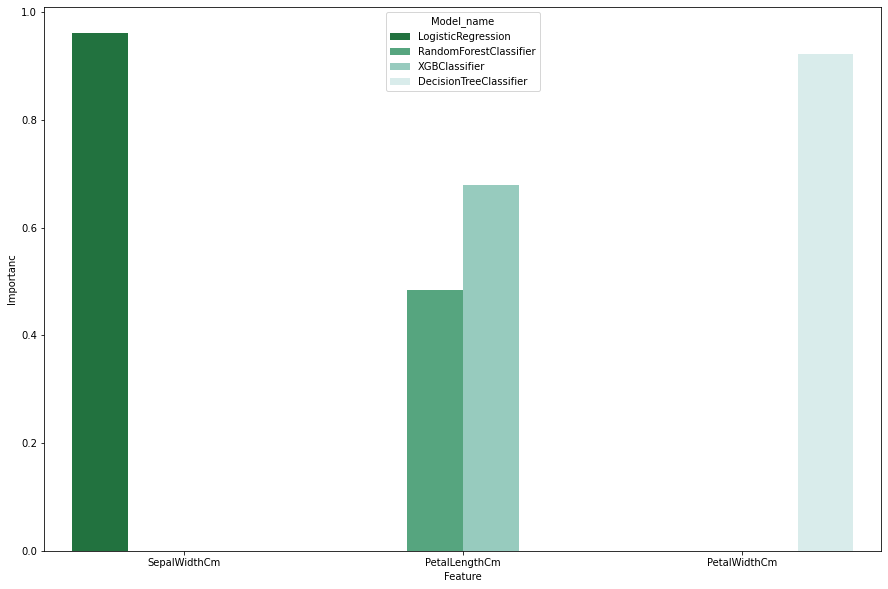

In [44]:
fig = plt.gcf()
fig.set_size_inches(15,10)
ax = sns.barplot(x="Feature", y="Importanc", data=df_importt, ci=False, hue = 'Model_name',palette="BuGn_r")